# A Predictive Analysis and Customer Segmentation on Amazon

## By: Pham Duy Anh Vu

## Part 1: Data Cleaning and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
amazon = pd.read_csv(r"C:\Users\vupha\Downloads\Amazon Customer Behavior Survey.csv")

In [3]:
amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [4]:
amazon.isnull().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [5]:
amazon.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


### 1. Apriori Algorithm

In [6]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Select the relevant features for Apriori
apriori_features = amazon["Purchase_Categories"]

# Convert the dataframe to a list of lists format
transactions = apriori_features.values.tolist()

# Apply TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Now you can use df for applying the Apriori algorithm
df

,,;,B,C,F,G,H,K,P,a,...,i,l,m,n,o,r,s,t,u,y
0,True,False,True,True,False,False,False,False,True,True,...,False,True,False,True,True,True,True,True,True,True
1,True,False,False,True,True,False,False,False,False,True,...,True,True,False,True,True,False,True,True,False,False
2,True,True,False,True,True,True,False,False,False,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,False,False,False,True,True,...,True,True,False,True,True,True,True,True,True,True
4,True,True,True,True,True,False,False,False,True,True,...,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,True,False,True,True,False,False,False,False,True,True,...,False,True,False,True,True,True,True,True,True,True
598,True,False,False,True,True,False,False,False,False,True,...,True,True,False,True,True,False,True,True,False,False
599,True,False,True,True,False,False,False,False,True,True,...,False,True,False,True,True,True,True,True,True,True
600,True,True,True,True,True,False,False,False,True,True,...,True,True,False,True,True,True,True,True,True,True


### 2. Decision Tree Classification

In [9]:
# Filter out the original dataset to only neccessary variables:
classification = amazon[["Gender", "Purchase_Frequency", "Purchase_Categories", "Browsing_Frequency", "Saveforlater_Frequency"]]

classification.drop(classification[classification["Gender"] == "Prefer not to say"].index, inplace=True)

mapping = {"Male" : 0, "Female" : 1, "Others" : 2}
classification["Gender"] = classification["Gender"].map(mapping)

classification

C:\Users\vupha\AppData\Local\Temp\ipykernel_23824\974842520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification.drop(classification[classification["Gender"] == "Prefer not to say"].index, inplace=True)
C:\Users\vupha\AppData\Local\Temp\ipykernel_23824\974842520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification["Gender"] = classification["Gender"].map(mapping)


,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Saveforlater_Frequency
0,1,Few times a month,Beauty and Personal Care,Few times a week,Sometimes
1,1,Once a month,Clothing and Fashion,Few times a month,Rarely
3,1,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Sometimes
4,1,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Few times a month,Rarely
5,1,Less than once a month,Clothing and Fashion,Rarely,Never
...,...,...,...,...,...
597,1,Once a week,Beauty and Personal Care,Few times a week,Sometimes
598,1,Once a week,Clothing and Fashion,Few times a week,Sometimes
599,1,Once a month,Beauty and Personal Care,Few times a week,Sometimes
600,1,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Sometimes


In [10]:
# Split the 'Purchase_Categories' column into separate columns
categories = classification['Purchase_Categories'].str.get_dummies(';')

# Concatenate the new columns with the original dataframe
classification = pd.concat([classification, categories], axis=1)

# Drop the original 'Purchase_Categories' column
classification.drop('Purchase_Categories', axis=1, inplace=True)

# Now you can use df_encoded for further analysis or model training
classification

,Gender,Purchase_Frequency,Browsing_Frequency,Saveforlater_Frequency,Beauty and Personal Care,Clothing and Fashion,Groceries and Gourmet Food,Home and Kitchen,others
0,1,Few times a month,Few times a week,Sometimes,1,0,0,0,0
1,1,Once a month,Few times a month,Rarely,0,1,0,0,0
3,1,Once a month,Few times a month,Sometimes,1,1,0,0,1
4,1,Less than once a month,Few times a month,Rarely,1,1,0,0,0
5,1,Less than once a month,Rarely,Never,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
597,1,Once a week,Few times a week,Sometimes,1,0,0,0,0
598,1,Once a week,Few times a week,Sometimes,0,1,0,0,0
599,1,Once a month,Few times a week,Sometimes,1,0,0,0,0
600,1,Few times a month,Few times a month,Sometimes,1,1,0,0,1


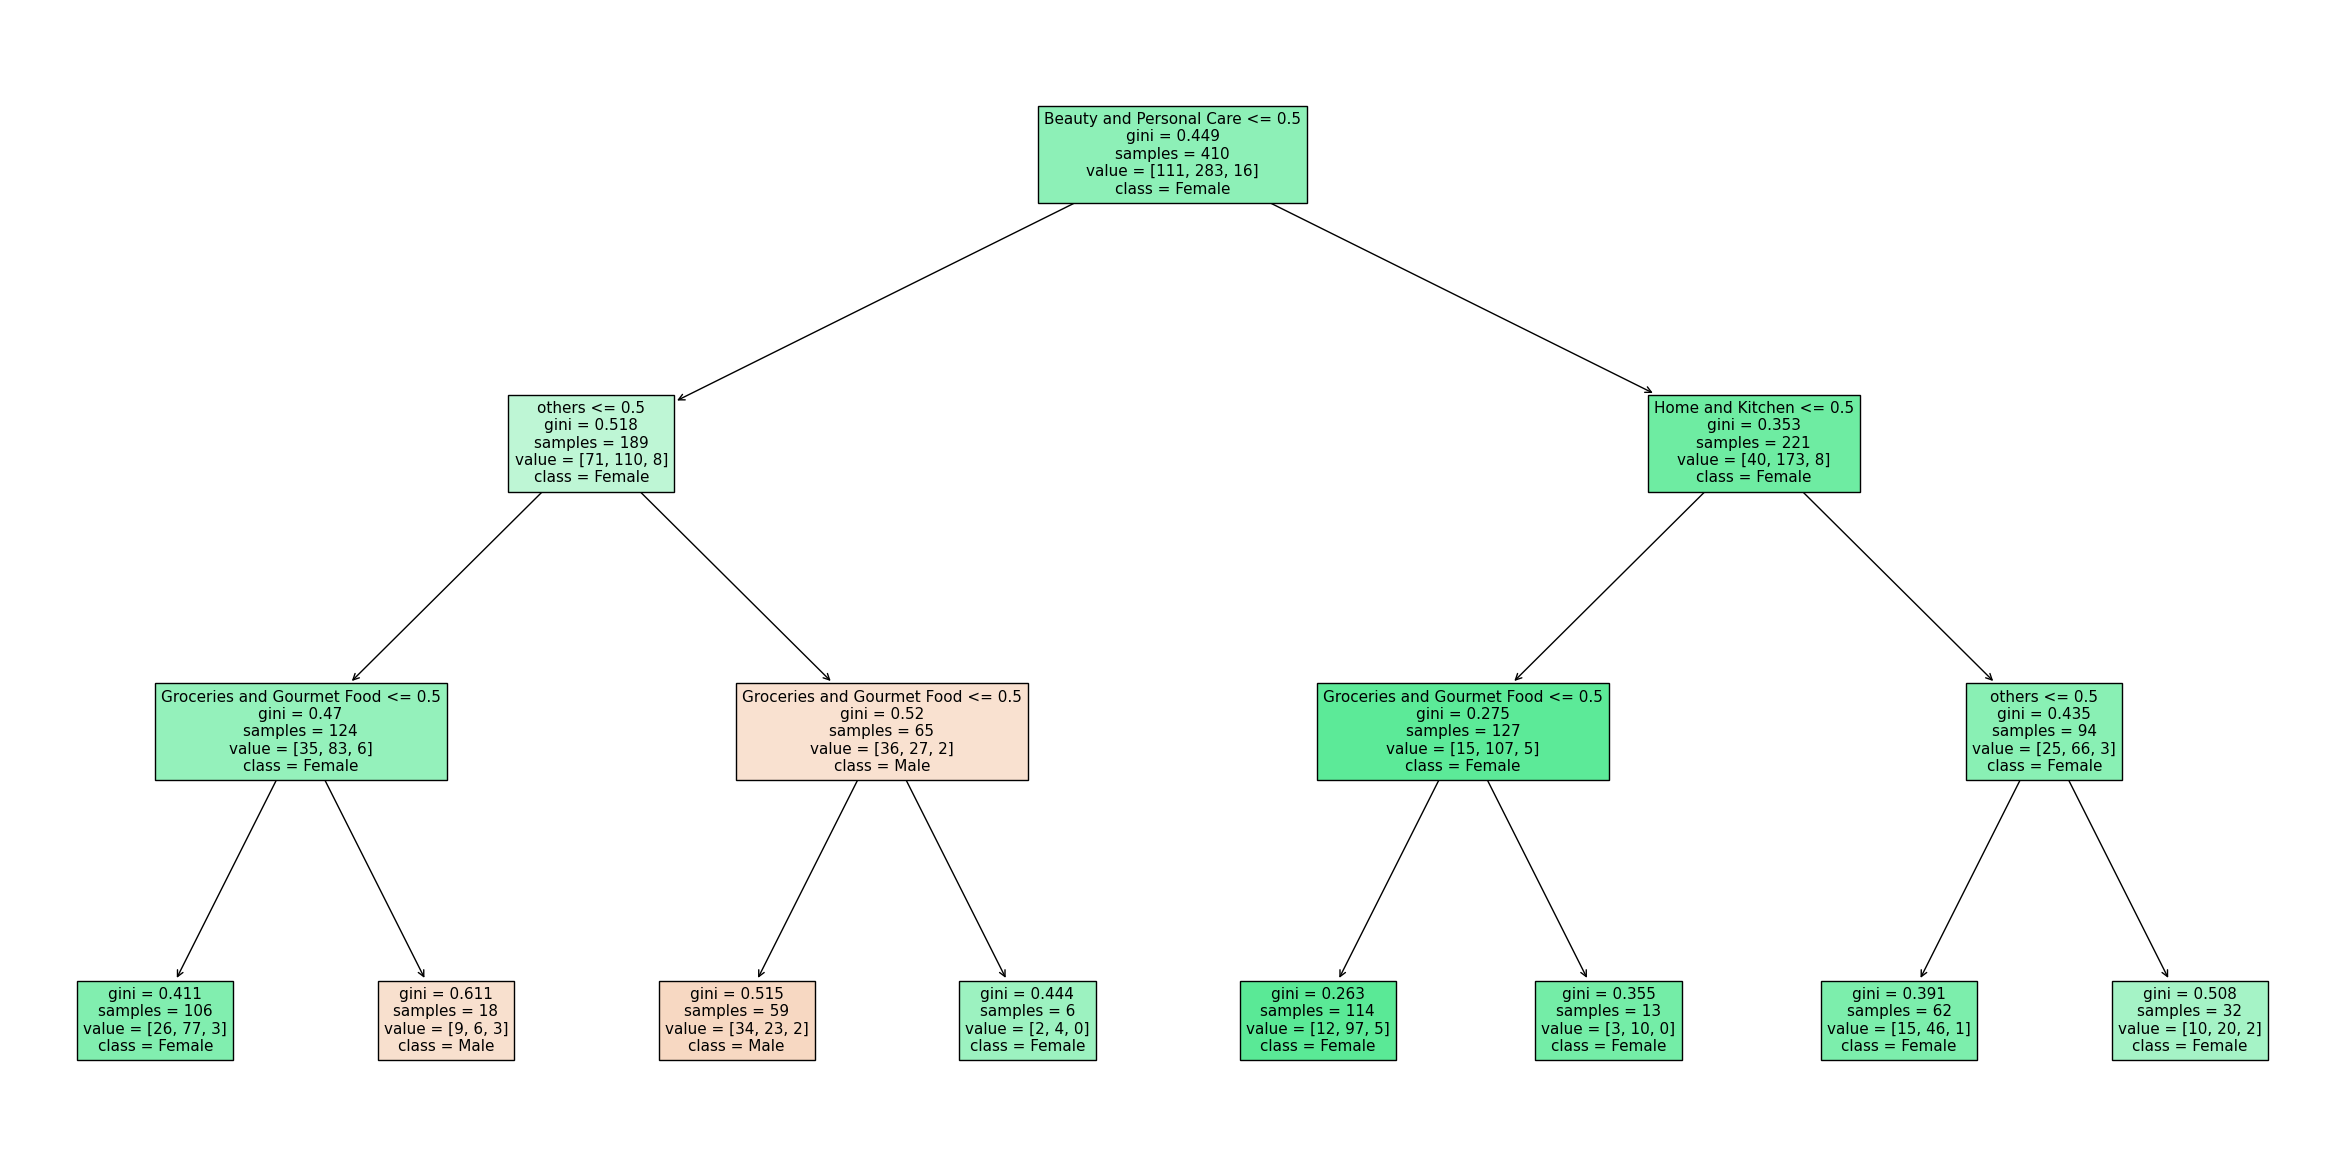

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = classification[["Beauty and Personal Care", "Clothing and Fashion", "Groceries and Gourmet Food", "Home and Kitchen", "others"]]
y = classification["Gender"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth = 3, random_state=42)
decision_tree_model.fit(X_train, y_train)

# # Plot decision tree
# plt.figure(figsize=(20,10))
# plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Male', 'Female'])  
# plt.show()

feature_names_list = X.columns.tolist()

# Plot decision tree
plt.figure(figsize=(30,15))
plot_tree(decision_tree_model, filled=True, feature_names=feature_names_list, class_names=['Male', 'Female', 'Others'])  
plt.show()

In [12]:
# Make predictions
decision_tree_predictions = decision_tree_model.predict(X_test)

# Display results
accuracy_decision_tree = accuracy_score(y_test, decision_tree_predictions)
print(f'Decision Tree Accuracy: {accuracy_decision_tree}')

Decision Tree Accuracy: 0.6601941747572816


### 3. Linear Regression

In [13]:
# Filter out the original dataset to only neccessary variables:
regress = amazon[["age", "Customer_Reviews_Importance", "Shopping_Satisfaction"]]

regress

,age,Customer_Reviews_Importance,Shopping_Satisfaction
0,23,1,1
1,23,1,2
2,24,2,3
3,24,5,4
4,22,1,2
...,...,...,...
597,23,4,4
598,23,3,3
599,23,3,3
600,23,1,2


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = regress.drop('age', axis=1)
y = regress['age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the first few actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 133.1131921175858
     Actual  Predicted
110      26  30.134548
419      36  31.407773
567      45  29.557069
77       24  30.308485
181      22  30.482421


### 3.1 kNN Regression

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# Separate features (X) and target variable (y)
X = regress.drop('age', axis=1)
y = regress['age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create k-Nearest Neighbors Regression model
k_neighbors = 5  # You can adjust the number of neighbors as needed
model = KNeighborsRegressor(n_neighbors=k_neighbors)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 155.37619834710742


### 4. K-means Clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical data
label_enc = LabelEncoder()
amazon['Purchase_Frequency'] = label_enc.fit_transform(amazon['Purchase_Frequency'])
amazon['Browsing_Frequency'] = label_enc.fit_transform(amazon['Browsing_Frequency'])

# Select and scale features
scaler = StandardScaler()
features = scaler.fit_transform(amazon[['Purchase_Frequency', 'Browsing_Frequency', 'Shopping_Satisfaction']])

# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

# Fit K-means
optimal_k = 3  # assuming the elbow is at k=3 from the inertia plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(features)

# Analyze clusters
amazon['Cluster'] = kmeans.labels_
amazon.groupby('Cluster').mean()

C:\Users\vupha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vupha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\vupha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vupha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,age,Purchase_Frequency,Browsing_Frequency,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
Cluster,,,,,,,
0,31.768657,1.253731,2.574627,2.395522,2.723881,2.708955,2.388060
1,31.127660,0.289362,0.523404,2.527660,2.659574,2.668085,2.451064
2,29.888412,3.300429,0.712446,2.480687,2.725322,2.656652,2.519313


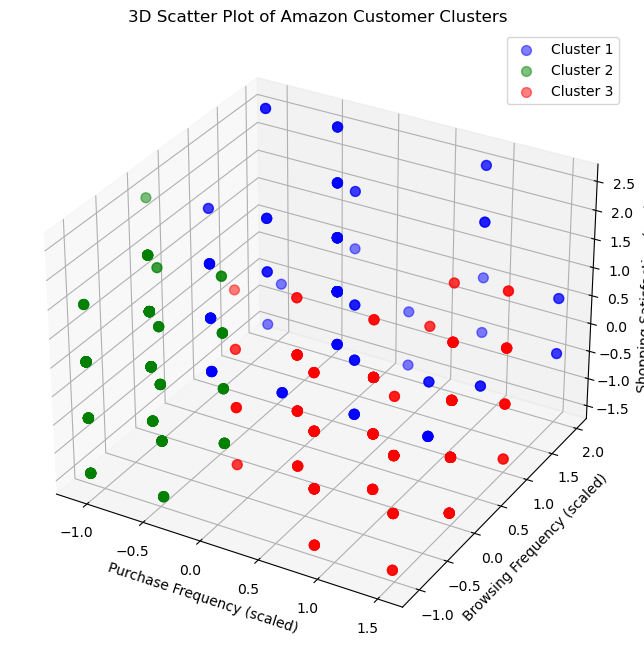

In [19]:
# Visualizing the k-means clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map for clusters
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

# Scatter plot for each cluster
for i in range(optimal_k):
    ax.scatter(features[kmeans.labels_ == i, 0],  # Purchase Frequency
               features[kmeans.labels_ == i, 1],  # Browsing Frequency
               features[kmeans.labels_ == i, 2],  # Shopping Satisfaction
               c=colors[i], label=f'Cluster {i+1}', s=50, alpha=0.5)

# Set plot labels and title
ax.set_xlabel('Purchase Frequency (scaled)')
ax.set_ylabel('Browsing Frequency (scaled)')
ax.set_zlabel('Shopping Satisfaction (scaled)')
ax.set_title('3D Scatter Plot of Amazon Customer Clusters')

# Legend
ax.legend()

# Show plot
plt.show()